<a href="https://colab.research.google.com/github/AliKarasneh/create-react-app/blob/master/TwitterSentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install langdetect


     |████████████████████████████████| 981 kB 7.7 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993241 sha256=1b6a5f48a643fb0574494a0696bca180fa4035e6c0c53a883b58fcfc8e69be54
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [7]:
!pip install tweepy

In [22]:
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
import tweepy
from textblob import TextBlob
import nltk
import pandas as pd
from matplotlib import pyplot as plt


# Authentication
consumerKey = 'rZms1g0HlFHDxlUmTbMV20vFk'
consumerSecret = '8ZygdjdRd0YdKXTvIvh07fD2SwCp1hFhnLNcM5qgD6GZ1dl02Q'
accessToken = '176112318-wVeHbbHx6A8wxgrJBHoLgVFitlUjzsqfe5OfSOcL'
accessTokenSecret = 'UMPsVRWULXSVEWKouANKjf1cmiIjLatwdCUUNQs5tXUm9'
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

Please enter keyword or hashtag to search: tesla
Please enter how many tweets to analyze: 5
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
total number:  5
positive number : 0
negative number:  0
neutral number:  1


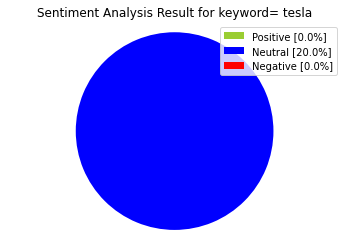

,0
0,RT @teslaownersSV: 2013-2020 Car company valua...
1,RT @kiwithesmol: “gUaRaNtEe yOu CoUld bUy a tE...
2,"RT @AustinTeslaClub: Wow, Giga Shanghai is abs..."
3,RT @KaplanBen_Fr: 3 jours pour éteindre l'#inc...
4,"may tesla na pala pinsan ko, taih naul"


In [23]:
#Sentiment Analysis
def percentage(part,whole):
 return 100 * float(part)/float(whole)
keyword = input('Please enter keyword or hashtag to search: ')
noOfTweet = int(input ('Please enter how many tweets to analyze: '))
tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []
for tweet in tweets:
 nltk.download('vader_lexicon')
 #nltk.download()
 #print(tweet.text)
 tweet_list.append(tweet.text)
 analysis = TextBlob(tweet.text)
 score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
 neg = score['neg']
 neu = score['neu']
 pos = score['pos']
 comp = score['compound']
 polarity += analysis.sentiment.polarity
 
if neg > pos:
  negative_list.append(tweet.text)
  negative += 1

elif pos > neg:
  positive_list.append(tweet.text)
  positive += 1

elif pos == neg:
 neutral_list.append(tweet.text)
 neutral += 1
positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print('total number: ',len(tweet_list))
print('positive number :',len(positive_list))
print('negative number: ', len(negative_list))
print('neutral number: ',len(neutral_list))

#Creating PieCart
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title('Sentiment Analysis Result for keyword= '+keyword+'' )
plt.axis('equal')
plt.show()
tweet_list